# DSSIM

This notebook opens original and compressed NetCDF files at a given data path, computes the DSSIM on the compressed files for specified time steps, and stores the values in a CSV file in the lcr/data/ directory.

In [1]:
# Make sure you are using the cmip6-2019.10 kernel

# Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys

sys.path.insert(0, '/glade/u/home/abaker/repos/ldcpy')
import ldcpy

# Display output of plots directly in Notebook
%matplotlib inline
# Automatically reload module if it is edited
%reload_ext autoreload
%autoreload 2

# silence warnings
import warnings

warnings.filterwarnings("ignore")
import os
hdf_pp = os.environ["HDF5_PLUGIN_PATH"]
env_list = ['export HDF5_PLUGIN_PATH='+hdf_pp]

In [2]:
# start the dask scheduler

# Note: This notebook should run on Cheyenne for now, running on casper will work for
# the most part but trying to plot the LHFLX variable will result in a timeout,
# presumably due to the large file sizes for the variable.

# for Cheyenne

from dask_jobqueue import PBSCluster



cluster = PBSCluster(
    queue="regular",
    walltime="02:00:00",
    project="NIOW0001",
    memory="109GB",
    resource_spec="select=1:ncpus=9:mem=109GB",
    cores=36,
    processes=9,
    env_extra=env_list
)


# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster

In [3]:
import dask
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

In [4]:
from dask.distributed import Client

# Connect client to the remote dask workers
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu//stable/user/abaker//proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu//stable/user/abaker//proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.14.134:37877,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu//stable/user/abaker//proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [8]:
import time

monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/"


for variable in daily_variables:
    print(variable)
    levels[variable] = [f"bg_2_{variable}",
                        f"bg_3_{variable}",
                        f"bg_4_{variable}", f"bg_5_{variable}",
                        f"bg_6_{variable}", f"bg_7_{variable}",]
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/research/bg/bg_2/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/research/bg/bg_3/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/research/bg/bg_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/research/bg/bg_5/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/research/bg/bg_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/research/bg/bg_7/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={})

for variable in monthly_variables:
    print(variable)
    levels[variable] = [f"bg_2_{variable}",
                        f"bg_3_{variable}",
                        f"bg_4_{variable}", f"bg_5_{variable}",
                        f"bg_6_{variable}", f"bg_7_{variable}",]
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/research/bg/bg_2/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/research/bg/bg_3/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/research/bg/bg_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/research/bg/bg_5/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/research/bg/bg_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/research/bg/bg_7/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



FLUT
dataset size in GB 1.13

LHFLX
dataset size in GB 1.13

PRECT
dataset size in GB 1.13

TAUX
dataset size in GB 1.13

TS
dataset size in GB 1.13

Z500
dataset size in GB 1.13

CCN3
dataset size in GB 2.79

CLOUD
dataset size in GB 2.79

FLNS
dataset size in GB 0.10

FLNT
dataset size in GB 0.10

FSNS
dataset size in GB 0.10

FSNT
dataset size in GB 0.10

LHFLX
dataset size in GB 0.10

PRECC
dataset size in GB 0.10

PRECL
dataset size in GB 0.10

PS
dataset size in GB 0.10

QFLX
dataset size in GB 0.10

SHFLX
dataset size in GB 0.10

TMQ
dataset size in GB 0.10

TS
dataset size in GB 0.10

U
dataset size in GB 2.79



In [9]:
cols_daily["TS"]

<xarray.Dataset>
Dimensions:     (collection: 7, time: 730, lat: 192, lon: 288)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-01-01 00:00:00 ... 2007-12-31 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U7 'orig_TS' 'bg_2_TS' ... 'bg_6_TS' 'bg_7_TS'
Data variables:
    TS          (collection, time, lat, lon) float32 dask.array<chunksize=(1, 730, 192, 288), meta=np.ndarray>
Attributes: (12/15)
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    ...               ...
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Mon May 10 15:18:41 2021: ncks -d time,0,729,1 b.e11.BR...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv
    file_size:        {'orig_TS': 94047978, 'bg_2_TS': 6409578, 'bg_3_TS': 20...

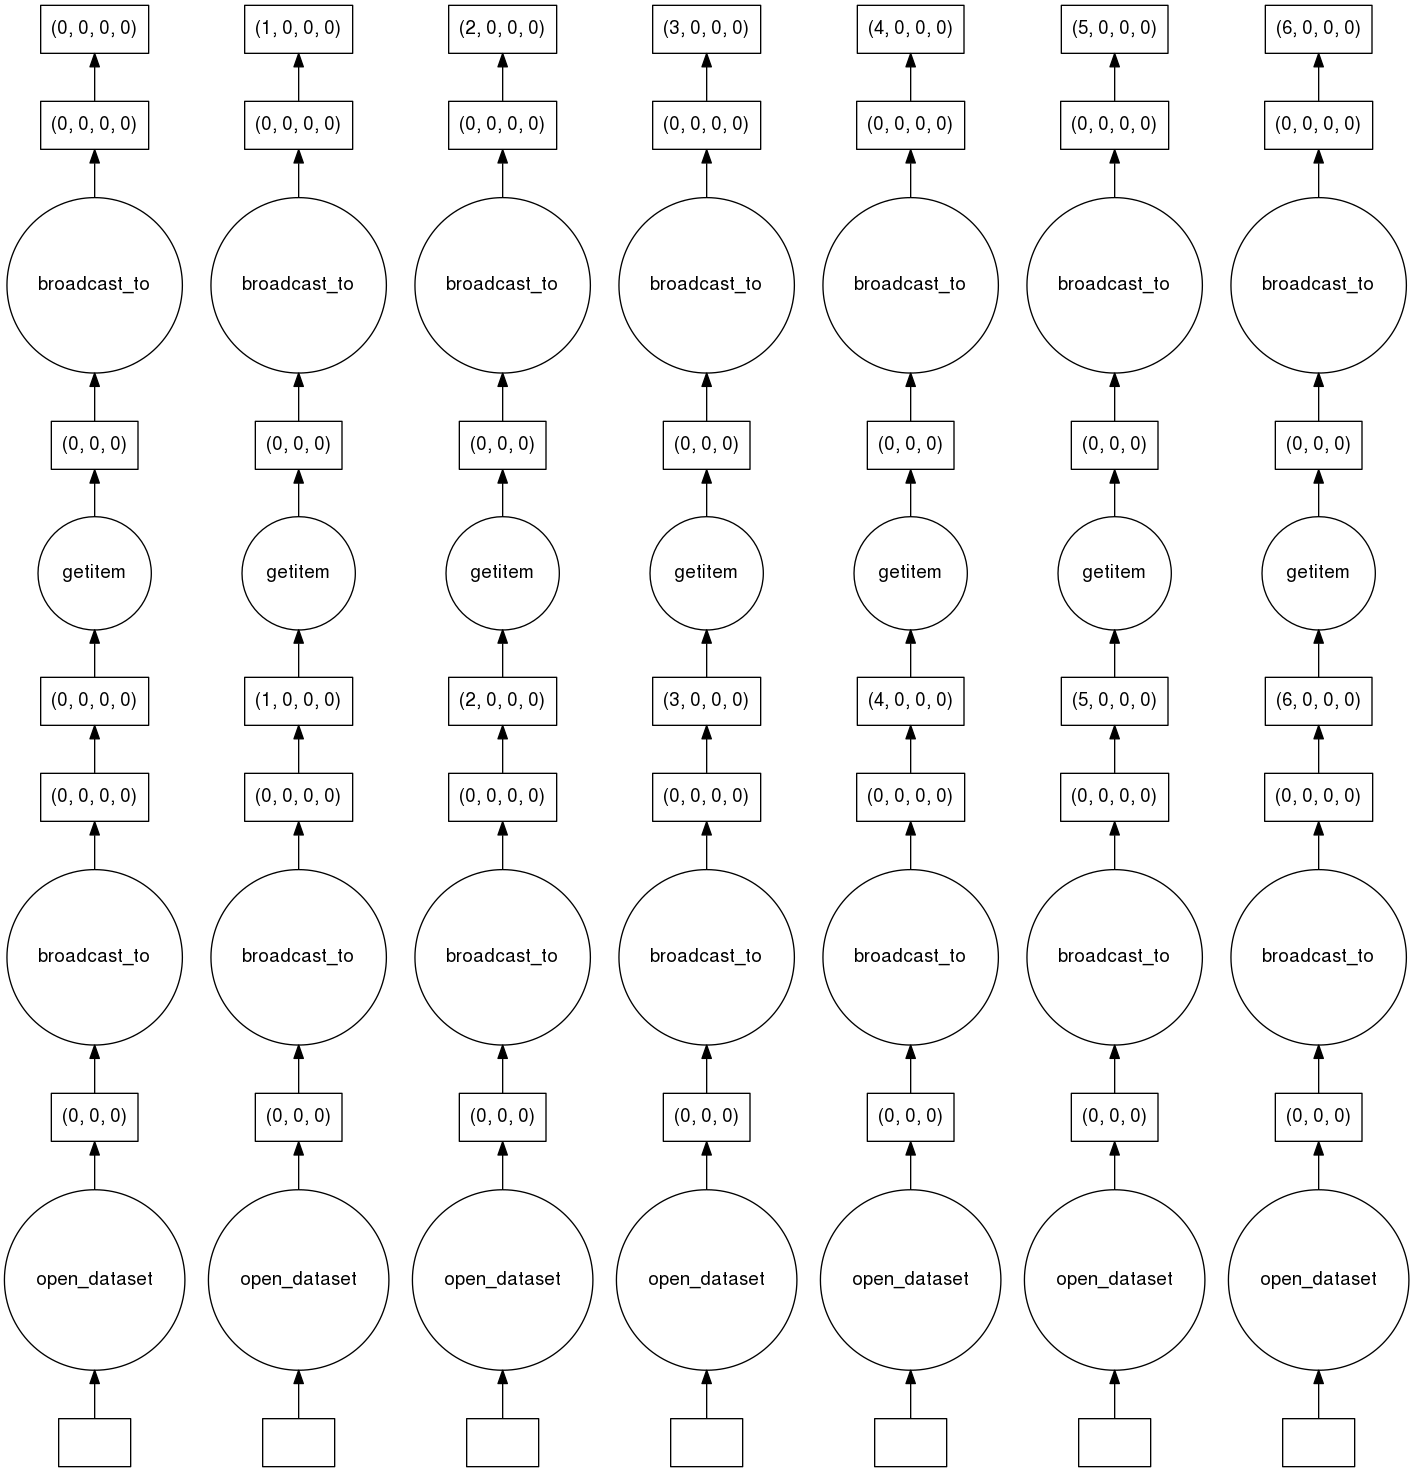

In [10]:

cols_daily["TS"].TS.data.visualize()


In [11]:
%time ldcpy.save_metrics(cols_daily["TS"], "TS", "orig_TS", "bg_2_TS", time=0, location="testfile.csv")

Evaluating metrics for orig_TS data (set1) and bg_2_TS data (set2), time 0 :
CPU times: user 598 ms, sys: 118 ms, total: 716 ms
Wall time: 1.8 s


0

In [12]:
%time ldcpy.save_metrics(cols_daily["TS"], "TS", "orig_TS", "bg_2_TS", time=1, location="testfile.csv")

Evaluating metrics for orig_TS data (set1) and bg_2_TS data (set2), time 1 :
CPU times: user 123 ms, sys: 4.31 ms, total: 128 ms
Wall time: 1.19 s


0

In [13]:
%time ldcpy.save_metrics(cols_daily["TS"], "TS", "orig_TS", "bg_2_TS", time=100, location="testfile.csv")

Evaluating metrics for orig_TS data (set1) and bg_2_TS data (set2), time 100 :
CPU times: user 131 ms, sys: 643 µs, total: 132 ms
Wall time: 1.19 s


0

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

for variable in daily_variables
    if variable == "TAUX":
        for time in range(160,cols_daily[variable].dims["time"]):
            for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")
    else:
        for time in range(0,cols_daily[variable].dims["time"]):
            for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")



In [ ]:
import time

monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/"


for variable in daily_variables:
    print(variable)
    levels[variable] = [f"zfp5_p_6_{variable}",
                        f"zfp5_p_8_{variable}",
                        f"zfp5_p_10_{variable}", f"zfp5_p_12_{variable}",
                        f"zfp5_p_14_{variable}", f"zfp5_p_16_{variable}",
                        f"zfp5_p_18_{variable}", f"zfp5_p_20_{variable}",
                        f"zfp5_p_22_{variable}", f"zfp5_p_24_{variable}",
                        f"zfp5_p_26_{variable}"]
    sets[variable] = [f"{data_path}/../orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_26/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = [f"zfp5_p_6_{variable}",
                        f"zfp5_p_8_{variable}",
                        f"zfp5_p_10_{variable}", f"zfp5_p_12_{variable}",
                        f"zfp5_p_14_{variable}", f"zfp5_p_16_{variable}",
                        f"zfp5_p_18_{variable}", f"zfp5_p_20_{variable}",
                        f"zfp5_p_22_{variable}", f"zfp5_p_24_{variable}",
                        f"zfp5_p_26_{variable}"]
    sets[variable] = [f"{data_path}/../orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_26/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



In [ ]:
# This one is for zfp hdf5


import matplotlib as mpl
import matplotlib.pyplot as plt

for variable in ["TAUX", "TS", "Z500"]:
    for time in range(0,60):
    #for time in range(0,cols_daily[variable].dims["time"]):
            for i in [f"zfp5_p_6",
                        f"zfp5_p_8",
                        f"zfp5_p_10", f"zfp5_p_12",
                        f"zfp5_p_14", f"zfp5_p_16",
                        f"zfp5_p_18", f"zfp5_p_20",
                        f"zfp5_p_22", f"zfp5_p_24",
                        f"zfp5_p_26"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims_zfp5_daily.csv")



In [ ]:
import time

daily_variables = ["bc_a1_SRF", "dst_a1_SRF", "dst_a3_SRF", "FLNS", "FLNSC",
                   "FLUT", "FSNS", "FSNSC", "FSNTOA", "ICEFRAC", "LHFLX", "pom_a1_SRF", "PRECL", "PRECSC",
                   "PRECSL", "PRECT", "PRECTMX", "PSL", "Q200", "Q500", "Q850", "QBOT", "SHFLX", "so4_a1_SRF",
                   "so4_a2_SRF", "so4_a3_SRF", "soa_a1_SRF", "soa_a2_SRF", "T010", "T200", "T500", "T850",
                   "TAUX", "TAUY", "TMQ", "TREFHT", "TREFHTMN", "TREFHTMX", "TS", "U010", "U200", "U500", "U850", "VBOT",
                   "WSPDSRFAV", "Z050", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research"


for variable in daily_variables:
    print(variable)
    levels[variable] = [f"bg_2_{variable}",
                        f"bg_3_{variable}",
                        f"bg_4_{variable}", f"bg_5_{variable}",
                        f"bg_6_{variable}", f"bg_7_{variable}",]
    sets[variable] = [f"{data_path}/daily_orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_2/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_3/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_5/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_7/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})
